# Previsão de Links

#### 1 - Carregando Bibliotecas e Redes

/home/vitorgr/.local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


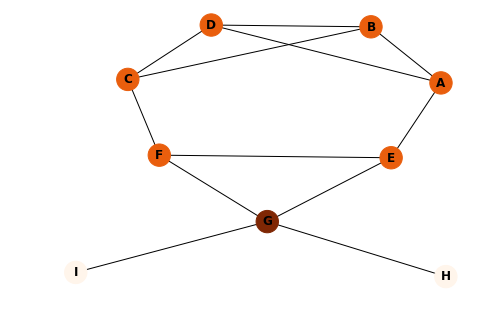

In [1]:
import networkx as nx
import collections
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

G = nx.Graph()
G.add_edges_from([('A','B'),('A','D'),('B','D'),
                  ('D','C'),('A','E'),('B','C'),
                  ('E','F'),('C','F'),('E','G')])
G.add_edges_from([('G','F'),('G','I'),('G','H')])


colors = []
for v in G:
    colors.append(G.degree(v));

nx.draw_kamada_kawai(G, node_color=colors, with_labels=True, cmap=plt.cm.Oranges, node_size=500, font_weight='bold')
plt.show()

#### 2 - Vizinhos comuns

In [2]:
CN = nx.common_neighbors(G, 'A', 'C')

list(CN)

['B', 'D']

#### 3 - Coeficiente de Jaccard

In [3]:
jacc = nx.jaccard_coefficient(G)
list(jacc)

[('I', 'A', 0.0),
 ('I', 'F', 0.3333333333333333),
 ('I', 'B', 0.0),
 ('I', 'E', 0.3333333333333333),
 ('I', 'C', 0.0),
 ('I', 'D', 0.0),
 ('I', 'H', 1.0),
 ('A', 'F', 0.2),
 ('A', 'H', 0.0),
 ('A', 'G', 0.16666666666666666),
 ('A', 'C', 0.5),
 ('F', 'D', 0.2),
 ('F', 'H', 0.3333333333333333),
 ('F', 'B', 0.2),
 ('B', 'H', 0.0),
 ('B', 'G', 0.0),
 ('B', 'E', 0.2),
 ('E', 'D', 0.2),
 ('E', 'H', 0.3333333333333333),
 ('E', 'C', 0.2),
 ('C', 'H', 0.0),
 ('C', 'G', 0.16666666666666666),
 ('G', 'D', 0.0),
 ('D', 'H', 0.0)]

#### 4 - Índice de Alocação de Recursos

In [4]:
list(nx.resource_allocation_index(G))

[('I', 'A', 0),
 ('I', 'F', 0.25),
 ('I', 'B', 0),
 ('I', 'E', 0.25),
 ('I', 'C', 0),
 ('I', 'D', 0),
 ('I', 'H', 0.25),
 ('A', 'F', 0.3333333333333333),
 ('A', 'H', 0),
 ('A', 'G', 0.3333333333333333),
 ('A', 'C', 0.6666666666666666),
 ('F', 'D', 0.3333333333333333),
 ('F', 'H', 0.25),
 ('F', 'B', 0.3333333333333333),
 ('B', 'H', 0),
 ('B', 'G', 0),
 ('B', 'E', 0.3333333333333333),
 ('E', 'D', 0.3333333333333333),
 ('E', 'H', 0.25),
 ('E', 'C', 0.3333333333333333),
 ('C', 'H', 0),
 ('C', 'G', 0.3333333333333333),
 ('G', 'D', 0),
 ('D', 'H', 0)]

#### 5 - Índice de Adamic-Adar

In [5]:
list(nx.adamic_adar_index(G))

[('I', 'A', 0),
 ('I', 'F', 0.7213475204444817),
 ('I', 'B', 0),
 ('I', 'E', 0.7213475204444817),
 ('I', 'C', 0),
 ('I', 'D', 0),
 ('I', 'H', 0.7213475204444817),
 ('A', 'F', 0.9102392266268373),
 ('A', 'H', 0),
 ('A', 'G', 0.9102392266268373),
 ('A', 'C', 1.8204784532536746),
 ('F', 'D', 0.9102392266268373),
 ('F', 'H', 0.7213475204444817),
 ('F', 'B', 0.9102392266268373),
 ('B', 'H', 0),
 ('B', 'G', 0),
 ('B', 'E', 0.9102392266268373),
 ('E', 'D', 0.9102392266268373),
 ('E', 'H', 0.7213475204444817),
 ('E', 'C', 0.9102392266268373),
 ('C', 'H', 0),
 ('C', 'G', 0.9102392266268373),
 ('G', 'D', 0),
 ('D', 'H', 0)]

#### 6 - Escore Preferential Attachment

In [6]:
list(nx.preferential_attachment(G))

[('I', 'A', 3),
 ('I', 'F', 3),
 ('I', 'B', 3),
 ('I', 'E', 3),
 ('I', 'C', 3),
 ('I', 'D', 3),
 ('I', 'H', 1),
 ('A', 'F', 9),
 ('A', 'H', 3),
 ('A', 'G', 12),
 ('A', 'C', 9),
 ('F', 'D', 9),
 ('F', 'H', 3),
 ('F', 'B', 9),
 ('B', 'H', 3),
 ('B', 'G', 12),
 ('B', 'E', 9),
 ('E', 'D', 9),
 ('E', 'H', 3),
 ('E', 'C', 9),
 ('C', 'H', 3),
 ('C', 'G', 12),
 ('G', 'D', 12),
 ('D', 'H', 3)]

#### 7 - Criando comunidades

In [7]:
G.node['A']['community'] = 0
G.node['B']['community'] = 0
G.node['C']['community'] = 0
G.node['D']['community'] = 0
G.node['E']['community'] = 1
G.node['F']['community'] = 1
G.node['G']['community'] = 1
G.node['H']['community'] = 1
G.node['I']['community'] = 1

#### 8 - Soundarajan-Hopcroft

In [8]:
list(nx.cn_soundarajan_hopcroft(G))

[('I', 'A', 0),
 ('I', 'F', 2),
 ('I', 'B', 0),
 ('I', 'E', 2),
 ('I', 'C', 0),
 ('I', 'D', 0),
 ('I', 'H', 2),
 ('A', 'F', 1),
 ('A', 'H', 0),
 ('A', 'G', 1),
 ('A', 'C', 4),
 ('F', 'D', 1),
 ('F', 'H', 2),
 ('F', 'B', 1),
 ('B', 'H', 0),
 ('B', 'G', 0),
 ('B', 'E', 1),
 ('E', 'D', 1),
 ('E', 'H', 2),
 ('E', 'C', 1),
 ('C', 'H', 0),
 ('C', 'G', 1),
 ('G', 'D', 0),
 ('D', 'H', 0)]

#### 9 - Alocação de Recursos com Soundarajan-Hopcroft

In [10]:
list(nx.ra_index_soundarajan_hopcroft(G))

[('I', 'A', 0),
 ('I', 'F', 0.25),
 ('I', 'B', 0),
 ('I', 'E', 0.25),
 ('I', 'C', 0),
 ('I', 'D', 0),
 ('I', 'H', 0.25),
 ('A', 'F', 0),
 ('A', 'H', 0),
 ('A', 'G', 0),
 ('A', 'C', 0.6666666666666666),
 ('F', 'D', 0),
 ('F', 'H', 0.25),
 ('F', 'B', 0),
 ('B', 'H', 0),
 ('B', 'G', 0),
 ('B', 'E', 0),
 ('E', 'D', 0),
 ('E', 'H', 0.25),
 ('E', 'C', 0),
 ('C', 'H', 0),
 ('C', 'G', 0),
 ('G', 'D', 0),
 ('D', 'H', 0)]